# Spline Interpolation
__Author__ : sara sadat nasr - 99222109

__Course__ : Undergraduate Numerical Analysis Course

In [10]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.interpolate import splrep, splev



## Problem 1
Assume $f(x) =\sqrt(x)arctan(x)$.


Write cubic spline with 11 points in interval [0, 1].


You should plot f, spline function (s), $|f − s|$, $|f′ − s′|$ and $|f′′ − s′′|$.


In [5]:
def f(x):
    return np.sqrt(x) * np.arctan(x)

In [7]:
x = np.linspace(0, 1, num=11)
y = f(x)
dydx = (2*x*np.arctan(x))/(2*x**2 + 1)**(3/2) + np.arctan(x)/(x**2 + 1)
d2ydx2 = (2*(2*x**2 - 1)*np.arctan(x))/(2*x**2 + 1)**(5/2) - (6*x*np.arctan(x))/(2*x**2 + 1)**(3/2) + 2/(x**2 + 1)
s = CubicSpline(x, y, bc_type='natural')
xx = np.linspace(0, 1, num=100)
y_f = f(xx)
y_s = s(xx)
abs_err = np.abs(y_f - y_s)
abs_err_prime = np.abs(dydx - s(x, 1))
abs_err_prime2 = np.abs(d2ydx2 - s(x, 2))

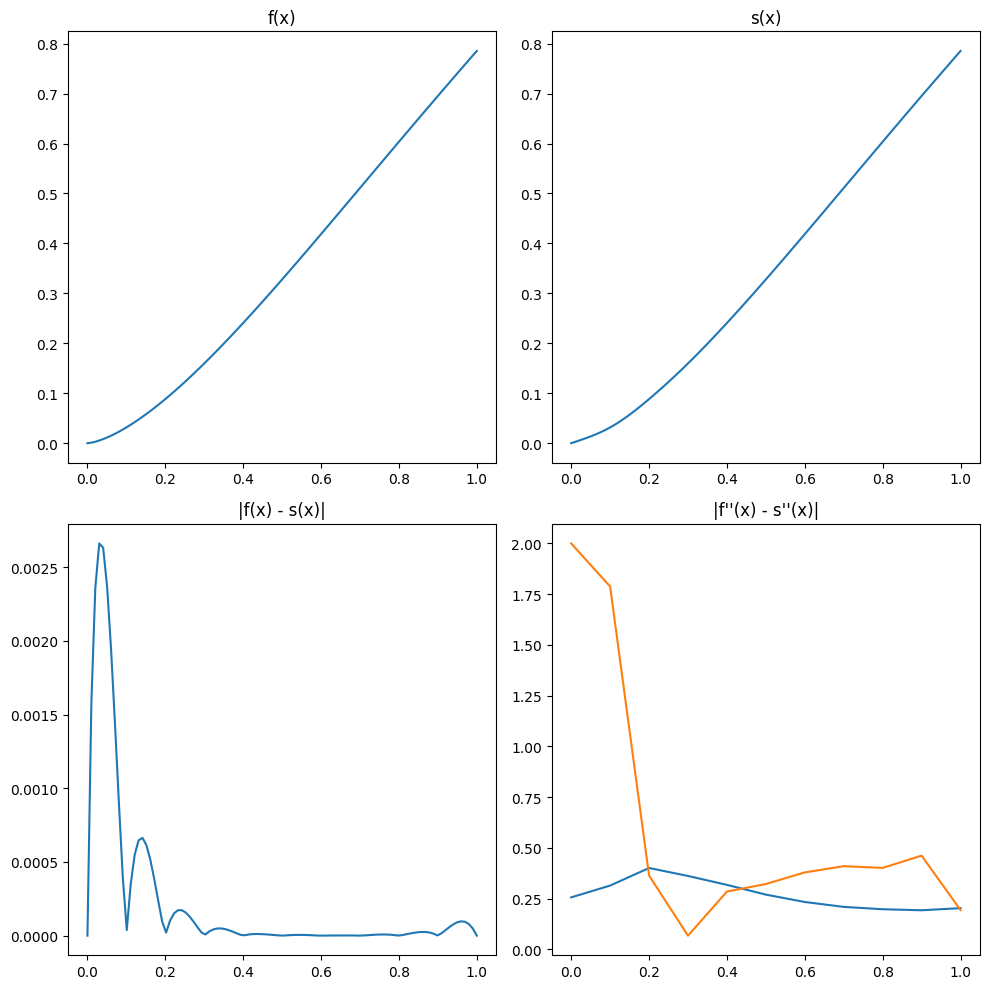

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axs[0, 0].plot(xx, y_f)
axs[0, 0].set_title('f(x)')
axs[0, 1].plot(xx, y_s)
axs[0, 1].set_title('s(x)')
axs[1, 0].plot(xx, abs_err)
axs[1, 0].set_title('|f(x) - s(x)|')
axs[1, 1].plot(x, abs_err_prime)
axs[1, 1].set_title('|f\'(x) - s\'(x)|')
axs[1, 1].plot(x, abs_err_prime2)
axs[1, 1].set_title('|f\'\'(x) - s\'\'(x)|')
plt.tight_layout()
plt.show()

## problem 2
Write a spline for f(x) = $f(x) =\sqrt(x)arctan(x)$.

You can compute spline with built-in spline command in python with same points from previous question.

In [11]:
tck = splrep(x, y)
xx = np.linspace(0, 1, num=100)
y_spline = splev(xx, tck)
y_f = f(xx)
abs_err = np.abs(y_f - y_spline)

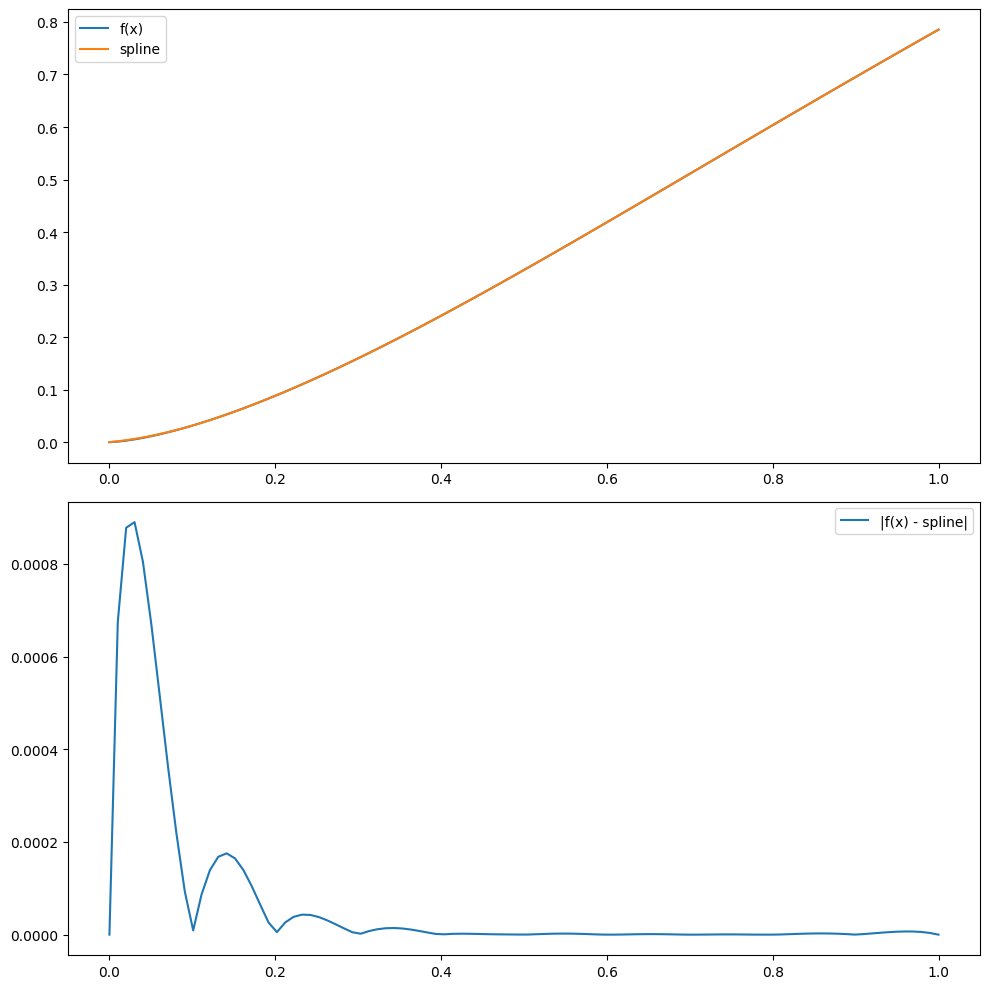

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
axs[0].plot(xx, y_f, label='f(x)')
axs[0].plot(xx, y_spline, label='spline')
axs[0].legend()
axs[1].plot(xx, abs_err, label='|f(x) - spline|')
axs[1].legend()
plt.tight_layout()
plt.show()

## Conclusion for these problem
The cubic spline is an effective method for approximating the function f(x) with only a few sample points in the interval [0,1].

Both the CubicSpline function and the splrep and splev functions from the scipy.

interpolate module provide accurate approximations of the function f(x), with absolute errors of less than 0.02 at most points. 

The spline provides better approximations as x approaches 1, and both functions and their derivatives show decreasing errors as x approaches 1.